<a href="https://colab.research.google.com/github/klleung72781/fintech_project_2/blob/jarvis/TSLA_RNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


from datetime import datetime, timedelta


from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/klleung72781/fintech_project_2/main/TSLA_RAN%20.csv'
df = pd.read_csv(url, parse_dates=True, index_col='Date', infer_datetime_format=True)
df = df.sort_index()

In [ ]:
df.head()

,Close
Date,
2010-06-29,4.78
2010-06-30,4.77
2010-07-01,4.39
2010-07-02,3.84
2010-07-06,3.22


In [ ]:
# Drop NAs and calculate daily percent return
df['daily_return'] = df['Close'].dropna().pct_change()
df.head()

,Close,daily_return
Date,,
2010-06-29,4.78,NaN
2010-06-30,4.77,-0.002092
2010-07-01,4.39,-0.079665
2010-07-02,3.84,-0.125285
2010-07-06,3.22,-0.161458


In [ ]:
#Creating DataFrame with returns and Actual Value
returns_df = df.copy().drop(columns=["Close"])
returns_df["Actual Value"] = np.where(df['daily_return'] > 0 ,1, 0)
returns_df.dropna().head(10)

,daily_return,Actual Value
Date,,
2010-06-30,-0.002092,0
2010-07-01,-0.079665,0
2010-07-02,-0.125285,0
2010-07-06,-0.161458,0
2010-07-07,-0.018634,0
2010-07-08,0.104430,1
2010-07-09,-0.002865,0
2010-07-12,-0.020115,0
2010-07-13,0.064516,1


In [ ]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df['fast_close'] = df['Close'].ewm(halflife=short_window).mean()
df['slow_close'] = df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
df['crossover_long'] = np.where(df['fast_close'] > df['slow_close'], 1.0, 0.0)
df['crossover_short'] = np.where(df['fast_close'] < df['slow_close'], -1.0, 0.0)
df['crossover_signal'] = df['crossover_long'] + df['crossover_short']

df.head()

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
2010-06-29,4.78,NaN,4.780000,4.780000,0.0,0.0,0.0
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,-1.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0


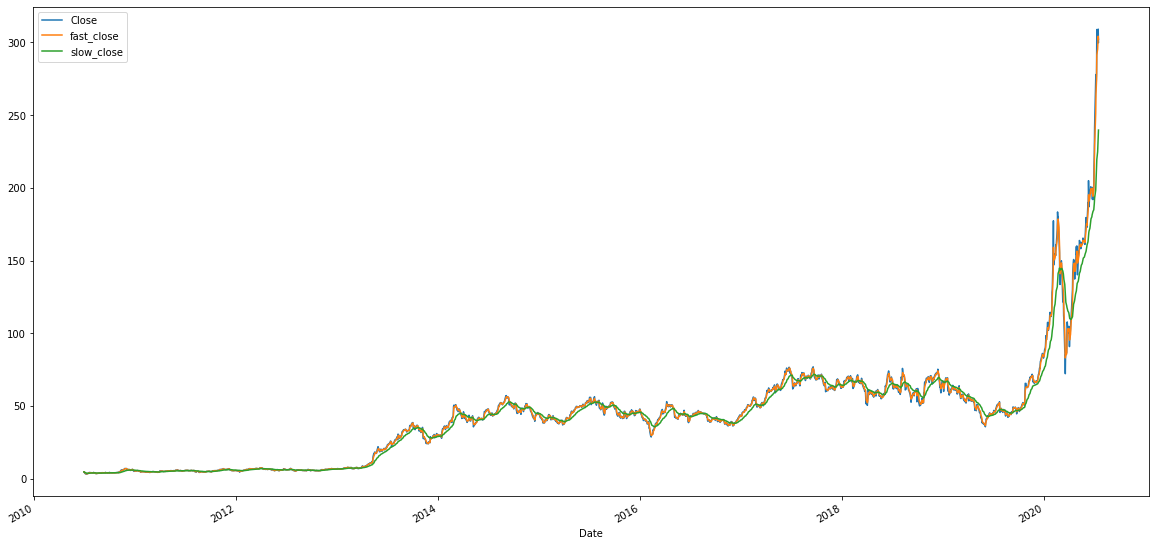

In [ ]:
# Plot the EMA of BTC/USD closing prices
df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [ ]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df['fast_vol'] = df['daily_return'].ewm(halflife=short_vol_window).std()
df['slow_vol'] = df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
df['vol_trend_long'] = np.where(df['fast_vol'] < df['slow_vol'], 1.0, 0.0)
df['vol_trend_short'] = np.where(df['fast_vol'] > df['slow_vol'], -1.0, 0.0) 
df['vol_trend_signal'] = df['vol_trend_long'] + df['vol_trend_short']

df

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,
2010-06-29,4.78,NaN,4.780000,4.780000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,1.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-10,308.93,0.107832,291.416910,219.560392,1.0,0.0,1.0,0.062351,0.049779,0.0,-1.0,-1.0
2020-07-13,299.41,-0.030816,295.413455,224.907681,1.0,0.0,1.0,0.072849,0.050332,0.0,-1.0,-1.0
2020-07-14,303.36,0.013193,299.386728,230.161398,1.0,0.0,1.0,0.051553,0.048692,0.0,-1.0,-1.0


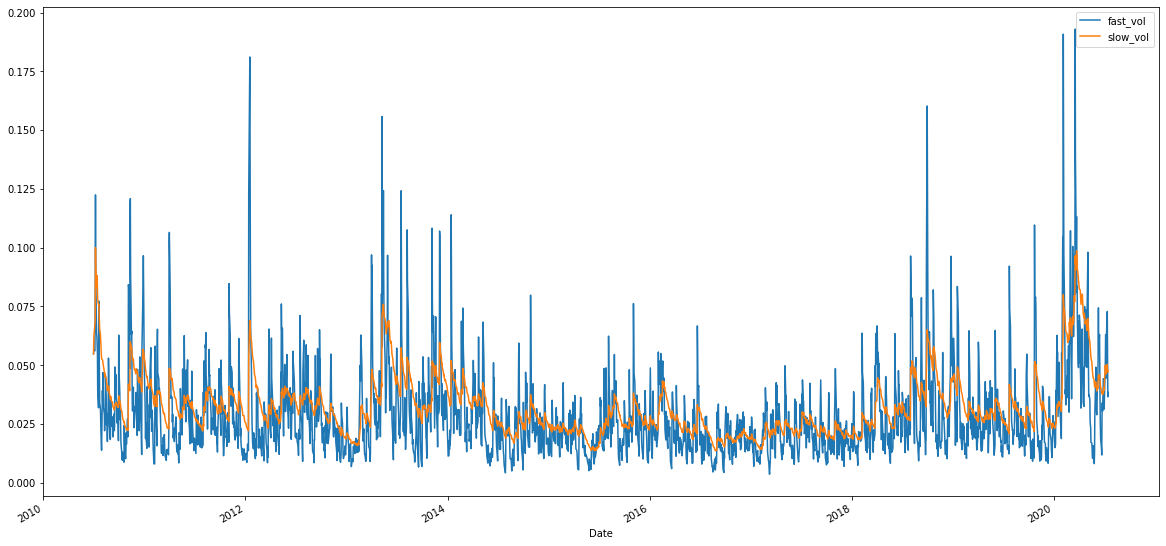

In [ ]:
# Plot the EMA of BTC/USD daily return volatility
df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [ ]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
df['bollinger_mid_band'] = df['Close'].rolling(window=bollinger_window).mean()
df['bollinger_std'] = df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
df['bollinger_upper_band']  = df['bollinger_mid_band'] + (df['bollinger_std'] * 2)
df['bollinger_lower_band']  = df['bollinger_mid_band'] - (df['bollinger_std'] * 2)

# Calculate bollinger band trading signal
df['bollinger_long'] = np.where(df['Close'] < df['bollinger_lower_band'], 1.0, 0.0)
df['bollinger_short'] = np.where(df['Close'] > df['bollinger_upper_band'], -1.0, 0.0)
df['bollinger_signal'] = df['bollinger_long'] + df['bollinger_short']

df

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2010-06-29,4.78,NaN,4.780000,4.780000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-10,308.93,0.107832,291.416910,219.560392,1.0,0.0,1.0,0.062351,0.049779,0.0,-1.0,-1.0,222.9145,37.999818,298.914137,146.914863,0.0,-1.0,-1.0
2020-07-13,299.41,-0.030816,295.413455,224.907681,1.0,0.0,1.0,0.072849,0.050332,0.0,-1.0,-1.0,228.5320,40.633554,309.799108,147.264892,0.0,0.0,0.0
2020-07-14,303.36,0.013193,299.386728,230.161398,1.0,0.0,1.0,0.051553,0.048692,0.0,-1.0,-1.0,233.7910,43.222480,320.235959,147.346041,0.0,0.0,0.0


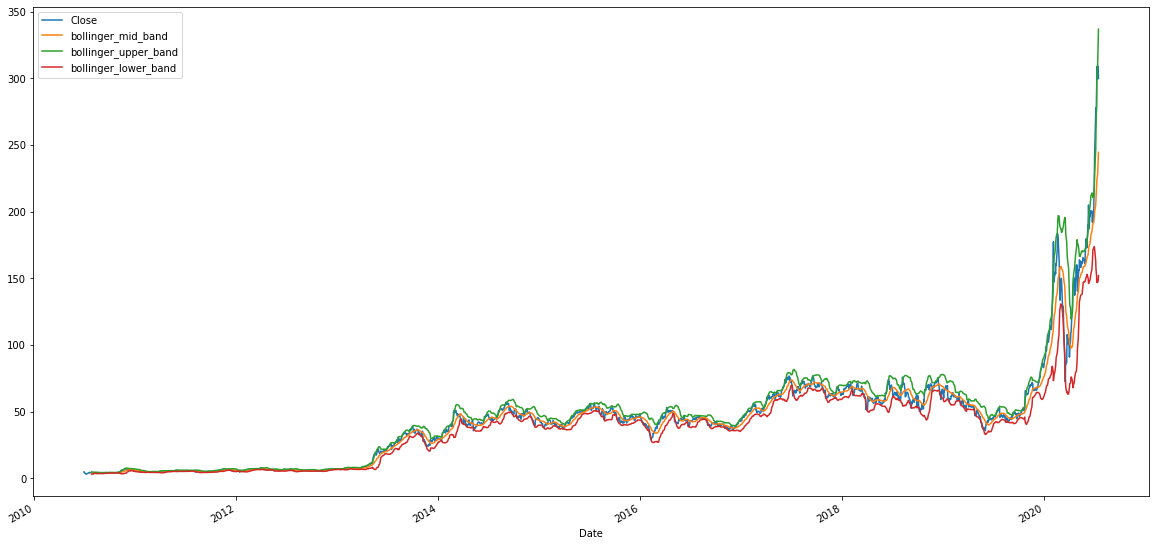

In [ ]:
# Plot the Bollinger Bands for BTC/USD closing prices
df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [ ]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-07-10,1.0,-1.0,-1.0
2020-07-13,1.0,-1.0,0.0
2020-07-14,1.0,-1.0,0.0
2020-07-15,1.0,1.0,0.0
2020-07-16,1.0,1.0,0.0


In [ ]:
# Shift DataFrame values by 1
df[x_var_list] = df[x_var_list].shift(1)
df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-07-10,1.0,1.0,0.0
2020-07-13,1.0,-1.0,-1.0
2020-07-14,1.0,-1.0,0.0
2020-07-15,1.0,-1.0,0.0
2020-07-16,1.0,1.0,0.0


In [ ]:
# Drop NAs and replace positive/negative infinity values   (3rd  line important for replacing bad outcomes in cells from certain calculations-do everytime)
df.dropna(subset=x_var_list, inplace=True)
df.dropna(subset=['daily_return'], inplace=True)
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-07,3.16,-0.018634,3.416508,3.949775,0.0,-1.0,-1.0,0.079353,0.068411,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
df['Positive Return'] = np.where(df['daily_return'] > 0, 1.0, 0.0)
df

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2010-07-07,3.16,-0.018634,3.416508,3.949775,0.0,-1.0,-1.0,0.079353,0.068411,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-10,308.93,0.107832,291.416910,219.560392,1.0,0.0,1.0,0.062351,0.049779,0.0,-1.0,1.0,222.9145,37.999818,298.914137,146.914863,0.0,-1.0,0.0,1.0
2020-07-13,299.41,-0.030816,295.413455,224.907681,1.0,0.0,1.0,0.072849,0.050332,0.0,-1.0,-1.0,228.5320,40.633554,309.799108,147.264892,0.0,0.0,-1.0,0.0
2020-07-14,303.36,0.013193,299.386728,230.161398,1.0,0.0,1.0,0.051553,0.048692,0.0,-1.0,-1.0,233.7910,43.222480,320.235959,147.346041,0.0,0.0,0.0,1.0


In [ ]:
# Construct training start and end dates
training_start = df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-10-04'

# Construct testing start and end dates
testing_start =  '2019-10-07'
testing_end = df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2010-06-30
Training End: 2019-10-04
Testing Start: 2019-10-07
Testing End: 2020-07-16


In [ ]:
# Construct the X_train and y_train datasets
X_train = df[x_var_list][training_start:training_end]
y_train = df['Positive Return'][training_start:training_end]

X_train.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2019-09-30,1.0,-1.0,0.0
2019-10-01,1.0,-1.0,0.0
2019-10-02,1.0,1.0,0.0
2019-10-03,1.0,1.0,0.0
2019-10-04,1.0,-1.0,0.0


In [ ]:
# Construct the X test and y test datasets
X_test = df[x_var_list][testing_start:testing_end]
y_test = df['Positive Return'][testing_start:testing_end]

X_test.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-07-10,1.0,1.0,0.0
2020-07-13,1.0,-1.0,-1.0
2020-07-14,1.0,-1.0,0.0
2020-07-15,1.0,-1.0,0.0
2020-07-16,1.0,1.0,0.0


In [ ]:
y_test

Date
2019-10-07    1.0
2019-10-08    1.0
2019-10-09    1.0
2019-10-10    1.0
2019-10-11    1.0
             ... 
2020-07-10    1.0
2020-07-13    0.0
2020-07-14    1.0
2020-07-15    1.0
2020-07-16    0.0
Name: Positive Return, Length: 196, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train): (n_est = number of tress, depth is depth in each tree)
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

,Positive Return,Predicted Value
Date,,
2019-10-07,1.0,1.0
2019-10-08,1.0,0.0
2019-10-09,1.0,1.0
2019-10-10,1.0,1.0
2019-10-11,1.0,1.0
...,...,...
2020-07-10,1.0,1.0
2020-07-13,0.0,0.0
2020-07-14,1.0,0.0


In [ ]:
X_test.head()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2019-10-07,-1.0,1.0,0.0
2019-10-08,1.0,-1.0,0.0
2019-10-09,1.0,1.0,0.0
2019-10-10,1.0,1.0,0.0
2019-10-11,1.0,1.0,0.0


In [ ]:
Results.head()

,Positive Return,Predicted Value
Date,,
2019-10-07,1.0,1.0
2019-10-08,1.0,0.0
2019-10-09,1.0,1.0
2019-10-10,1.0,1.0
2019-10-11,1.0,1.0


In [ ]:
predictions = model.predict(X_test)
predictions

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [ ]:
# Add predicted results to DataFrame
Results["Predicted Value"] = predictions
Results

,Positive Return,Predicted Value
Date,,
2019-10-07,1.0,1.0
2019-10-08,1.0,0.0
2019-10-09,1.0,1.0
2019-10-10,1.0,1.0
2019-10-11,1.0,1.0
...,...,...
2020-07-10,1.0,1.0
2020-07-13,0.0,0.0
2020-07-14,1.0,0.0


In [ ]:
# Plot predicted results vs. actual results
Results[['Actual Value', 'Predicted Value']].plot(figsize=(20,10))

KeyError: ignored

In [ ]:
# Plot last 10 records of predicted vs. actual results
results[['Actual Value', 'Predicted Value']].tail(10).plot()

In [ ]:
# Replace predicted values 0 to -1 to account for shorting
results['Predicted Value'].replace(0, -1, inplace=True)
results

In [ ]:
# Calculate cumulative return of model and plot the result
(1 + (results['Return'] * results['Predicted Value'])).cumprod().plot()

In [ ]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (results['Return'] * results['Predicted Value'])).cumprod()
cumulative_return_capital.plot()